<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Socialmedia_ads  129 non-null    float64
 1   Printmedia_ads   129 non-null    float64
 2   Google_ads       129 non-null    float64
 3   Promotions       129 non-null    float64
 4   Sales_revenue    129 non-null    float64
dtypes: float64(5)
memory usage: 5.2 KB


c:\ProgramData\anaconda3\envs\simple_linear_regression\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


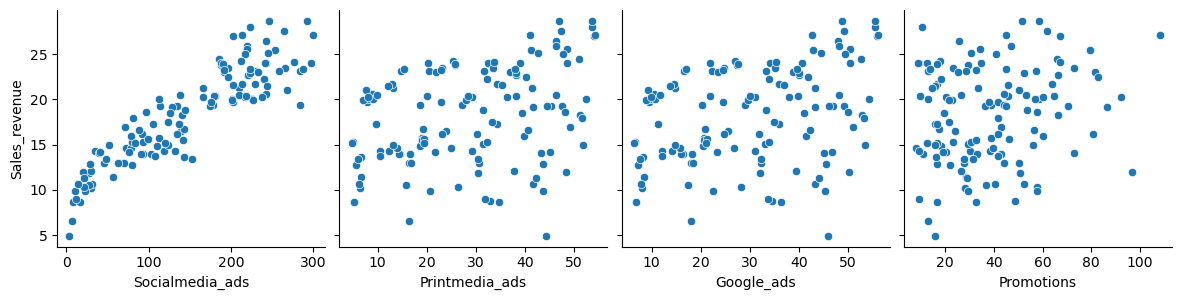

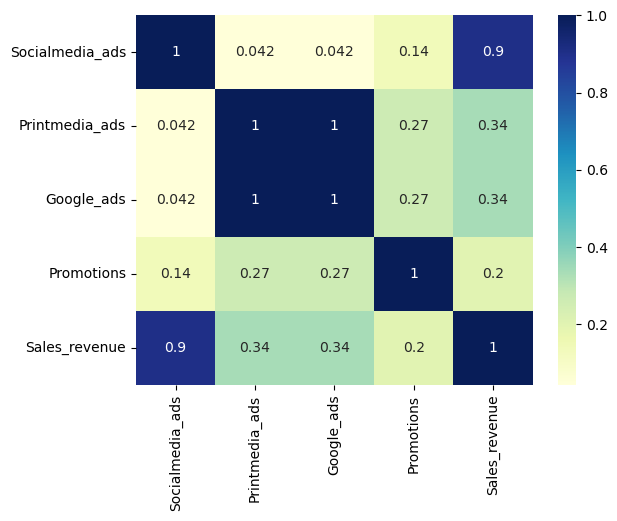

C:\Users\jerin\AppData\Local\Temp\ipykernel_34100\3698846081.py:62: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins=15)


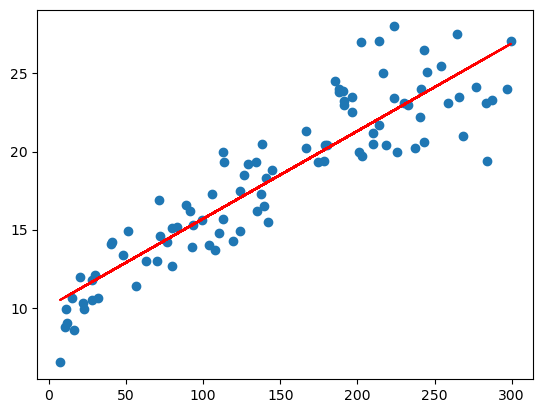

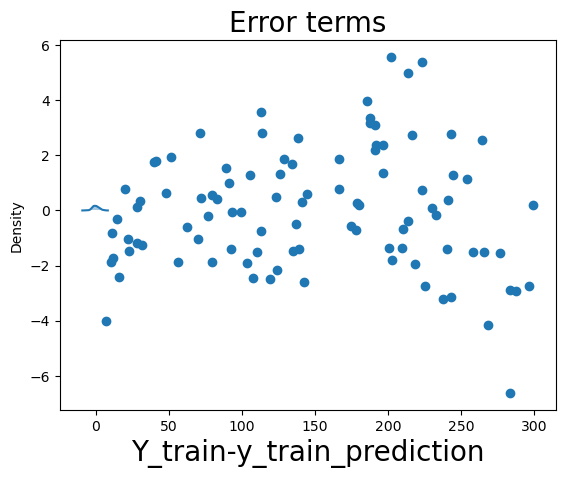

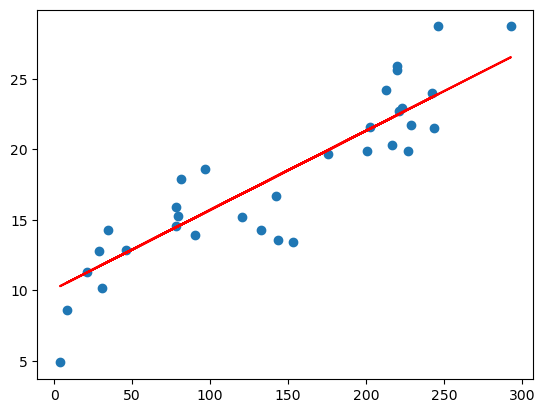

In [11]:
import pandas as pd
import numpy as np

#step1 - read and understand the data
# read csv file using pandas
Marketing_Sales_Data=pd.read_csv("MarketingExpenses_SalesRevenue.csv")
Marketing_Sales_Data

# Know the data shape, info and data descriptions
Marketing_Sales_Data.shape
Marketing_Sales_Data.info()
Marketing_Sales_Data.describe()

#step2: visualize data
# Generate the scatter plot for each indepdent variable with respect to sales revenue
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Marketing_Sales_Data, x_vars=['Socialmedia_ads','Printmedia_ads','Google_ads','Promotions'], y_vars=['Sales_revenue'], kind='scatter', aspect=1, size=3)
plt.show()

#Genrate heatmap to check correlation
sns.heatmap(Marketing_Sales_Data.corr(), cmap='YlGnBu', annot=True)
plt.show()

# Create the X and Y values
X=Marketing_Sales_Data['Socialmedia_ads']
Y=Marketing_Sales_Data['Sales_revenue']

# split training set and test test
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test= train_test_split(X,Y,train_size=.75,test_size=.25, random_state=100)

# third step - build and generate model
import statsmodels.api as sm
X_train_with_const=sm.add_constant(X_train)
#X_train_with_const

#generate best fit line using ordinary least square 

bestFitLine=sm.OLS(Y_train,X_train_with_const).fit()

# print parameters of best fit line
bestFitLine.params

# summary of best fit regression line
#print(bestFitLine.t_test([1, 0]))
bestFitLine.summary()

#Plot scatter plot using best fit line 

plt.scatter(X_train,Y_train)
plt.plot(X_train,10.0904 + 0.0561*X_train ,'r')
plt.show

#step4 - residual analysis

y_train_prediction= bestFitLine.predict(X_train_with_const)
residual= Y_train-y_train_prediction

#check normal distribution in residual using histogram
residualFigure=plt.figure()
sns.distplot(residual, bins=15)
plt.title("Error terms", fontsize=20)
plt.xlabel("Y_train-y_train_prediction",fontsize= 20)

# check any specific pattern exist on residual
plt.scatter(X_train,residual)
plt.show()

#step5 - make predicitons
# add constant to test data and make prediction of y value
x_test_add_contant=sm.add_constant(x_test)
y_test_prediction=bestFitLine.predict(x_test_add_contant)
y_test_prediction

# find R square 
from sklearn.metrics import r2_score
# Checking the R-squared value
r_squared_value = r2_score(y_test, y_test_prediction)
r_squared_value

#scatter plot for best fit line of test data
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_prediction, 'r')
plt.show()